## Imports and preparations

In [2]:
import pandas as pd
import numpy as np
import csv
import math
from matplotlib import pyplot as plt
from calendar import month_abbr
import preprocessing_utils_copy
from preprocessing_utils import transform_categorical_column
from time import strptime

In [3]:
train_data = pd.read_csv("train.csv")

## Data Exploration

### We will start with a glimpse of data and its features:

In [3]:
print(f"Data description:")
train_data.describe()

Data description:


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10479.00000,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,5239.00000,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3025.17107,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,2619.50000,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,5239.00000,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,7858.50000,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,10478.00000,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000


In [4]:
print(f"Data glimpse:")
train_data.head()

Data glimpse:


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0


In [5]:
print(f"Number of rows: {train_data.shape[0]}")
print(f"Number of features: {train_data.shape[1]}")

Number of rows: 10479
Number of features: 23


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10479 non-null  int64  
 1   num_of_admin_pages     9874 non-null   float64
 2   admin_page_duration    10066 non-null  float64
 3   num_of_info_pages      9792 non-null   float64
 4   info_page_duration     10162 non-null  object 
 5   num_of_product_pages   10076 non-null  float64
 6   product_page_duration  9858 non-null   object 
 7   total_duration         5726 non-null   float64
 8   BounceRates            10457 non-null  float64
 9   ExitRates              10453 non-null  float64
 10  PageValues             10452 non-null  float64
 11  closeness_to_holiday   9983 non-null   float64
 12  Month                  10454 non-null  object 
 13  device                 10156 non-null  float64
 14  internet_browser       9916 non-null   object 
 15  Re

At first, we tried to look at the data and get familiar with it how it looks, and which data types are used for each column.
We used df.describe, df. head and df.info to just have a glimpse at the data and "feel" how it behaves.
It will later help us to understand how we would like to manipulate it in our favor.

### Let's try to see how that data distributes:

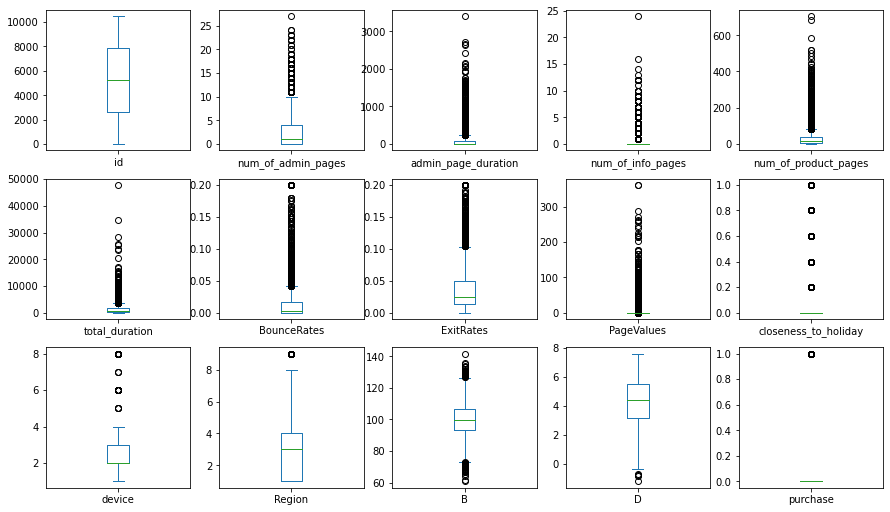

In [48]:
train_data.plot(kind="box", subplots=True,layout = (5,5), figsize=(15,15));

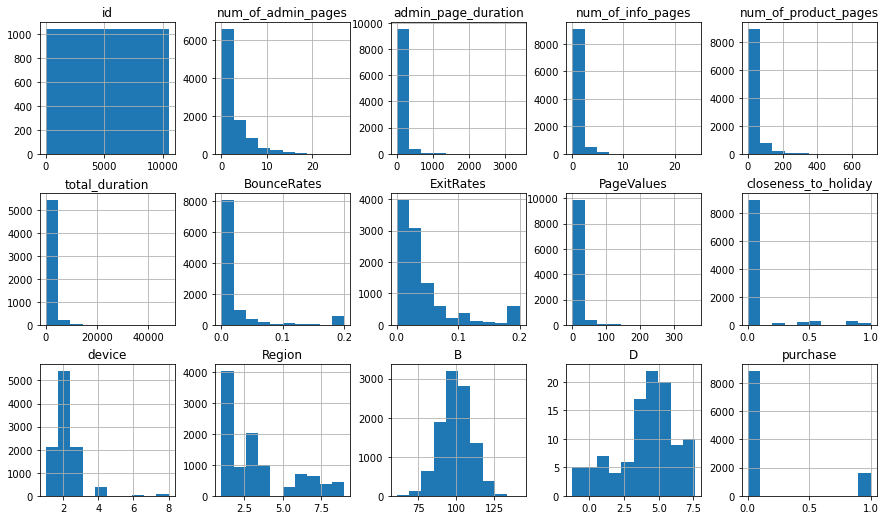

In [63]:
train_data.hist(layout = (5,5), figsize=(15,15));

These two plots help us understand a few things:
1. Not all of the columns are relevant for plotting as they are - like ID and purchase. These are fixed values and it's irrelevant to see their distributions.
2. Some of the coulums are normally distributed, or close to it - like column "B", "D" and "Device".
3. We can easily identify some of the otliers. For example - the values "6" and "8" in "Device" column, some of the durations etc. We will deal with it in a later stage.

## Data cleaning

The next thing we want to check out is whether we have missing data. We did see in the data glimpse that some of the values are filled with NaNs, so we we'd like to see what's the best way to deal with it.

In [136]:
data_summary = pd.DataFrame()
data_summary['missing'] = train_data.isna().sum()
data_summary['percentile'] = (data_summary.missing / train_data.shape[0]) * 100
data_summary.sort_values(by='missing', ascending=False)

,missing,percentile
D,10374,98.997996
total_duration,4753,45.357381
A,706,6.737284
num_of_info_pages,687,6.555969
product_page_duration,621,5.926138
num_of_admin_pages,605,5.773452
internet_browser,563,5.372650
closeness_to_holiday,496,4.733276
admin_page_duration,413,3.941216
num_of_product_pages,403,3.845787


As we can see, column "D" and "total_duration" have the most NaN values. Let's try to see what's special about them:

In [81]:
train_data[train_data["D"].notna()]

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
34,34,0.0,0.000000,0.0,0.0 minutes,9.0,482.0 minutes,NaN,0.000000,0.022222,...,2.0,browser_5_v7,1.0,Returning_Visitor,False,c_6,97.305385,log8080,7.257361,0
179,179,2.0,40.000000,0.0,0.0 minutes,5.0,558.5 minutes,598.500000,0.000000,0.028571,...,2.0,chrome_90.1.7,7.0,New_Visitor,True,c_2,100.425325,log_100,5.521225,0
222,222,1.0,13.000000,0.0,0.0 minutes,2.0,20.0 minutes,NaN,0.000000,0.050000,...,3.0,chrome_98.0.1,3.0,Returning_Visitor,False,c_2,104.686348,log200,4.348781,0
328,328,4.0,61.000000,0.0,0.0 minutes,14.0,175.6666667 minutes,NaN,0.000000,0.010588,...,2.0,chrome_80,5.0,Returning_Visitor,False,c_2,93.755824,log202,5.011107,0
346,346,7.0,151.000000,0.0,0.0 minutes,44.0,1406.1 minutes,NaN,0.004082,0.006501,...,1.0,safari_15,4.0,Returning_Visitor,False,c_2,83.061903,log200,5.531061,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,9779,0.0,0.000000,0.0,0.0 minutes,12.0,1952.75 minutes,NaN,0.033333,0.068333,...,2.0,edge_99.0.1150.46,8.0,Returning_Visitor,False,c_1,115.233372,log404,1.632070,0
9924,9924,0.0,0.000000,0.0,0.0 minutes,57.0,1234.5 minutes,NaN,0.001724,0.020690,...,2.0,browser_7_v19,2.0,Returning_Visitor,True,c_2,90.084329,log400,2.905838,0
10282,10282,10.0,260.250000,0.0,0.0 minutes,31.0,1694.333333 minutes,1954.583333,0.017143,0.039048,...,2.0,chrome_99.1.3,4.0,Returning_Visitor,False,c_3,91.706110,log400,3.932566,0
10388,10388,0.0,0.000000,6.0,97.16666667 minutes,81.0,3466.794048 minutes,NaN,0.018431,0.022050,...,3.0,NaN,1.0,Returning_Visitor,True,c_13,80.989223,log_100,4.842721,0


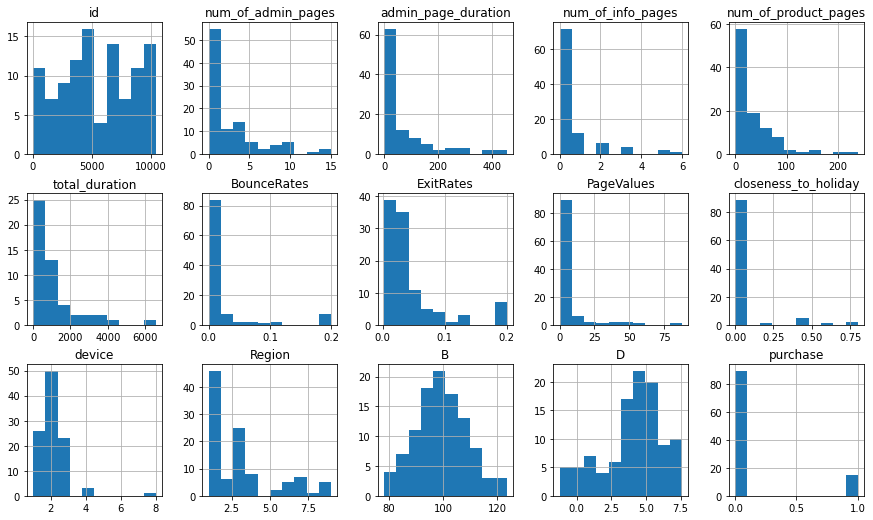

In [83]:
train_data[train_data["D"].notna()].hist(layout = (5,5), figsize=(15,15));

As there not seems to be much change in the data between empty and non empty "D" values, and we saw that the range for the "D" values are -1.23 to 7.61, we will fill it for now with -999.

In [140]:
train_data["D"] = train_data["D"].fillna(-999)

Let's move to total_duration:

In [201]:
train_data[train_data["total_duration"].isna()]

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,-999.0,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,-999.0,0
5,5,0.0,0.0,0.0,0.0 minutes,2.0,NaN,NaN,0.000000,0.100000,...,2.0,NaN,2.0,Returning_Visitor,False,c_3,104.712405,log200,-999.0,0
6,6,0.0,0.0,0.0,0.0 minutes,3.0,738.0 minutes,NaN,0.000000,0.022222,...,2.0,edge_96.0.1054.72,1.0,Returning_Visitor,False,c_2,89.786568,log404,-999.0,0
8,8,NaN,0.0,0.0,0.0 minutes,16.0,407.75 minutes,NaN,0.018750,0.025833,...,1.0,safari_15.4,4.0,Returning_Visitor,False,NaN,83.931739,log_100,-999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,10469,NaN,0.0,0.0,0.0 minutes,NaN,1128.583333 minutes,NaN,0.000000,0.013043,...,2.0,chrome_80,1.0,Returning_Visitor,False,c_2,114.103238,log202,-999.0,0
10470,10470,0.0,0.0,0.0,0.0 minutes,8.0,143.5833333 minutes,NaN,0.014286,0.050000,...,2.0,chrome_90.1.7,3.0,Returning_Visitor,False,c_1,94.270379,log404,-999.0,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,...,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,-999.0,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,...,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,-999.0,0


It seems that the total_duration column is empty even though other durations are filled with actual values. We will fill the empty values with the sum of the other values.
But first, we need to try and fill the other duration values.

For other fields, we will use KNN to try and fill-in the missing data. But first we will clean it a little bit.

In [149]:
dup = train_data.copy()

In [150]:
dup['info_page_duration'] = dup['info_page_duration'].apply(lambda x: float(x.split()[0]) if type(x) == str else x) # extract float from string
dup['product_page_duration'] = dup['product_page_duration'].apply(lambda x: float(x.split()[0]) if type(x) == str else x) # extract float from string
dup['Month'] = dup['Month'].apply(lambda x: strptime(x[:3], '%b').tm_mon if type(x) == str else x) # convert month name to number
dup['C'] = dup['C'].str.extract('(\d+)') # extract only digits
dup['C'] = dup['C'].apply(lambda x: float(x) if type(x) == str else x) # make it a float

In [151]:
def knn_mean(df, n):
    out = df.copy()
    for i, val in enumerate(df):
        if math.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(df)+1, int(i+n_by_2)])
            ts_near = np.concatenate([df[lower:i], df[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out


In [152]:
columns_list = list(data_summary[(data_summary['percentile'] > 0) & (data_summary['percentile'] < 40)].index)
columns_list.remove('C')
columns_list.remove('A') # TODO: deal with columns A and C
unalbe_to_process = []
for column in columns_list:
    try:
        dup[column] = knn_mean(dup[column],8)
    except Exception as e:
        unalbe_to_process.append(column)
print(f"Columns that we were unable to process with the KNN function: {unalbe_to_process}")

/var/folders/34/t06l6cqx111gmm_k8g7kk4d80000gn/T/ipykernel_53782/3069067800.py:9: RuntimeWarning: Mean of empty slice
  out[i] = np.nanmean(ts_near)


Columns that we were unable to process with the KNN function: ['internet_browser']


We got to columns that we weren't able to deal with. We will clean it with different approach - since "user_type" has 3 options ('Returning', 'New' and 'Other'), we will fill the NaN value with "Other", since we can't assume the real type of the user.

In [153]:
print(f"Unique values in 'user_type' before fillna: {list(dup['user_type'].unique())}")
dup['user_type'] = dup['user_type'].fillna('Other') # filled NaN values with "other"

Unique values in 'user_type' before fillna: ['Returning_Visitor', 'New_Visitor', nan, 'Other']


For 'internet values' we will use a separate function. #TODO: fix it

In [154]:
dup['internet_browser'] #TODO: fix it with Miki's function

0                safari_15
1                safari_14
2            browser_3_v17
3            chrome_99.1.3
4        edge_96.0.1054.75
               ...        
10474        browser_6_v12
10475        chrome_98.0.1
10476        chrome_99.1.3
10477            chrome_80
10478            chrome_89
Name: internet_browser, Length: 10479, dtype: object

And now, back to filling in the overall duration. Since we changed the type of all other durations and used KNN to fill in the missing values, we can sum up all the durations in order to fill the overall session duration.

In [155]:
dup['total_duration'] = dup['total_duration'].fillna(dup['info_page_duration'] + dup['product_page_duration'] + dup['admin_page_duration'])

data_summary = pd.DataFrame()
data_summary['missing'] = dup.isna().sum()
data_summary['percentile'] = (data_summary.missing / dup.shape[0]) * 100
data_summary.sort_values(by='missing', ascending=False)

,missing,percentile
A,706,6.737284
internet_browser,563,5.372650
C,23,0.219487
id,0,0.000000
Month,0,0.000000
D,0,0.000000
B,0,0.000000
Weekend,0,0.000000
user_type,0,0.000000
Region,0,0.000000


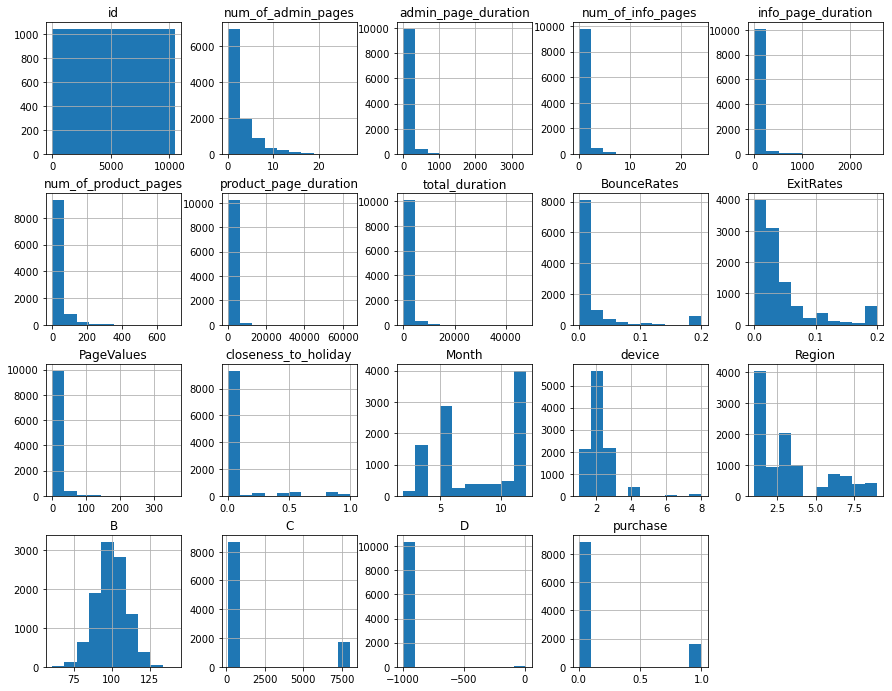

In [156]:
dup.hist(layout = (5,5), figsize=(15,15));